In [99]:
# notebook, test & write the derivative in matrix form; 
# equivalent in latex alg; 
# prj -> [[prj-(24-10-16)-rewrite-monomial-basis-latex-algorithm]]

### Basic Polynomial Eval

In [100]:
import matplotlib.pyplot as plt

In [101]:
import sympy as sp

In [102]:
import numpy as np

In [103]:
class PolynomialDrawer():

    def __init__(self, mat, control_values):

        self.mat = mat

        self.coeffs = control_values

    def eval(self, t):

        powers = [i for i in range(0,len(self.coeffs))][::-1]
        
        return t**powers @ self.mat @ self.coeffs

In [105]:
random_matrix = np.random.rand(4, 4)

In [106]:
random_matrix

array([[0.18842829, 0.10009505, 0.05271927, 0.18253846],
       [0.45938313, 0.39324808, 0.79555118, 0.79114705],
       [0.8236726 , 0.69399774, 0.95033586, 0.54851551],
       [0.72505891, 0.71842107, 0.85796941, 0.93634904]])

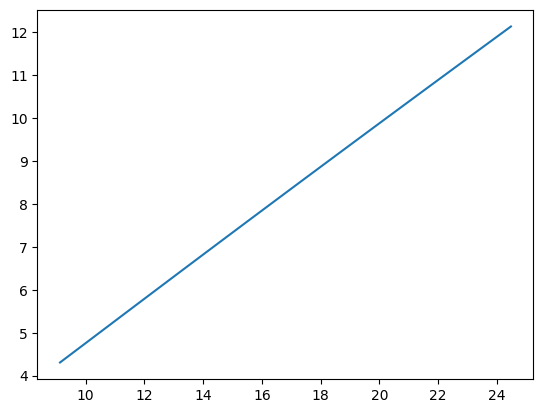

In [107]:
vertices = [0, 0], [5, 1], [1, 2], [5, 2]

s = PolynomialDrawer(random_matrix, [*vertices])

tetha = np.linspace(0,1, 100)

points = [s.eval(t) for t in tetha]

plt.plot(*zip(*points))

### Differentiable Matrix (at evaluation)

In [108]:
import numpy as np

In [109]:
m_val = [*vertices]

In [110]:
m_mat = np.array([

        [2, -2, 1, 1],
        [-3, 3, -2, -1],
        [0, 0, 1, 0],
        [1, 0, 0, 0]

    ])

mat1 = m_mat @ m_val

In [111]:
mat1

array([[-4,  2],
       [ 8, -3],
       [ 1,  2],
       [ 0,  0]])

In [112]:
# derivative number to evaluate at

n = 1

In [113]:
# parameter space

t = 0.4

In [114]:
# expand into array

t = np.expand_dims(t, -1)

t

array([0.4])

In [115]:
# matrix reduction by deriv number

coeffs = mat1[:-n or None]

In [116]:
coeffs

array([[-4,  2],
       [ 8, -3],
       [ 1,  2]])

In [117]:
#power basis (terms of matrix dim)

powers = np.arange(len(coeffs))[::-1]

powers

array([2, 1, 0])

In [118]:
# weights ny powers and n

weights = [powers + 1 + i for i in range(n)]

In [119]:
# reduce

weights = np.multiply.reduce(weights) 

weights

array([3, 2, 1])

In [120]:
# monomial basis; 

t**powers

array([0.16, 0.4 , 1.  ])

In [121]:
# full operation

t**powers * weights

array([0.48, 0.8 , 1.  ])

In [122]:
# full operation, with input matrix

(t**powers * weights) @ coeffs

array([5.48, 0.56])

In [123]:
# reducing the powers
# weights at diff deriv values

ns = [0, 1, 2, 3, 4]

for n in ns: 

    weights = np.multiply.reduce([powers + 1 + i for i in range(n)]) 

    print (weights)

1.0
[3 2 1]
[12  6  2]
[60 24  6]
[360 120  24]


In [124]:
# values at different derevatives

In [125]:
ns = [0, 1, 2, 3]

for n in ns: 

    t = 0.5

    print("deriv:", n)

    coefsss = mat1[:-n or None]

    # print ("matrix", coeffs)

    powers = np.arange(len(coefsss))[::-1]

    print ("powrs:", powers)

    t = np.expand_dims(t, -1)

    print("t_vec:",t**powers)

    weights = [powers + 1 + i for i in range(n)]

    print("weigh:", weights)

    weights = np.multiply.reduce(weights) 

    print("wei_r:", weights)

    print("---")

deriv: 0
powrs: [3 2 1 0]
t_vec: [0.125 0.25  0.5   1.   ]
weigh: []
wei_r: 1.0
---
deriv: 1
powrs: [2 1 0]
t_vec: [0.25 0.5  1.  ]
weigh: [array([3, 2, 1])]
wei_r: [3 2 1]
---
deriv: 2
powrs: [1 0]
t_vec: [0.5 1. ]
weigh: [array([2, 1]), array([3, 2])]
wei_r: [6 2]
---
deriv: 3
powrs: [0]
t_vec: [1.]
weigh: [array([1]), array([2]), array([3])]
wei_r: [6]
---


### Polynomial Drawer (differentiable mode)

In [126]:
class PolynomialDrawer_Diff():

    def __init__(self, mat, control_values):

        self.mat = mat

        self.coeffs = control_values

    def eval(self, t, n):

        coeffs1 = (self.mat @ self.coeffs)[:-n or None]

        powers = np.arange(len(coeffs1))[::-1]

        weights = [powers + 1 + i for i in range(n)]

        weights = np.multiply.reduce(weights)

        t_mon = np.expand_dims(t, -1)
        
        return (t_mon**powers * weights) @ coeffs1

In [127]:
vertices = [0, 0], [5, 1], [1, 2], [5, 2]

np.array([*vertices])

array([[0, 0],
       [5, 1],
       [1, 2],
       [5, 2]])

In [128]:
vertices = np.array([[0, 0], [5, 1], [1, 2], [5, 2]])

vertices

array([[0, 0],
       [5, 1],
       [1, 2],
       [5, 2]])

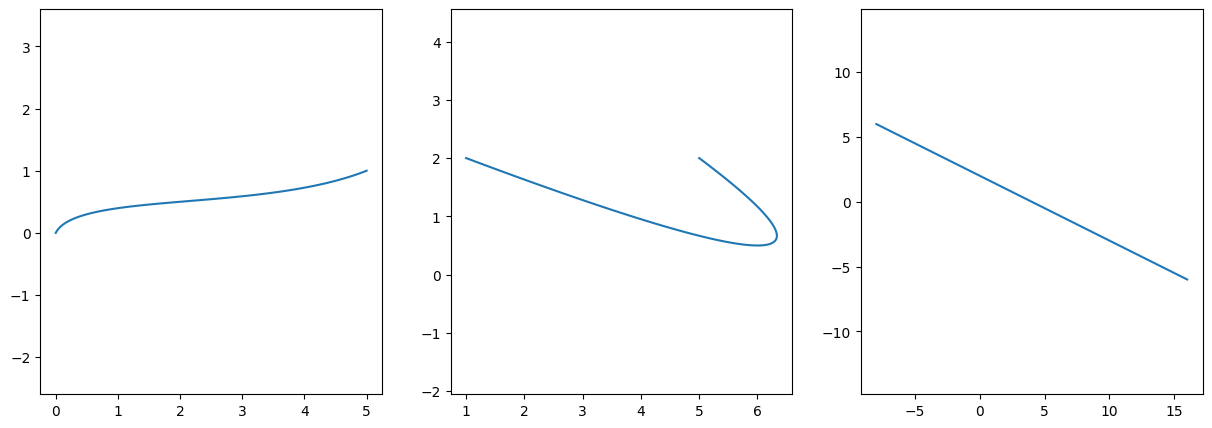

In [131]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

ns = [0, 1, 2]

for idx, n in enumerate(ns):

    m_mat = np.array([

        [2, -2, 1, 1],
        [-3, 3, -2, -1],
        [0, 0, 1, 0],
        [1, 0, 0, 0]

    ])

    vertices = np.array([[0, 0], [5, 1], [1, 2], [5, 2]])

    s = PolynomialDrawer_Diff(m_mat, vertices)

    tetha = np.linspace(0,1, 100)

    render = [s.eval(t, n) for t in tetha]

    axs[idx].plot(*zip(*render))
    # axs[idx].plot(*vertices.T, 'x:g')
    axs[idx].axis('equal');

plt.show()